<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

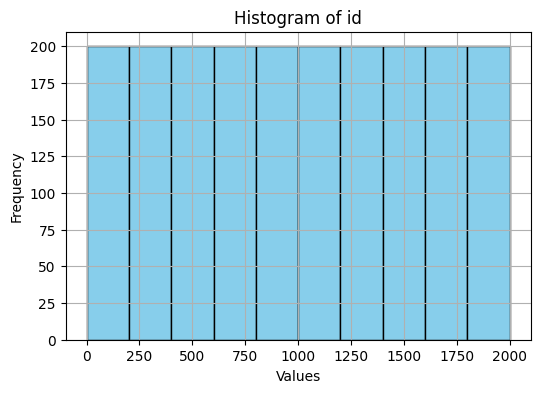

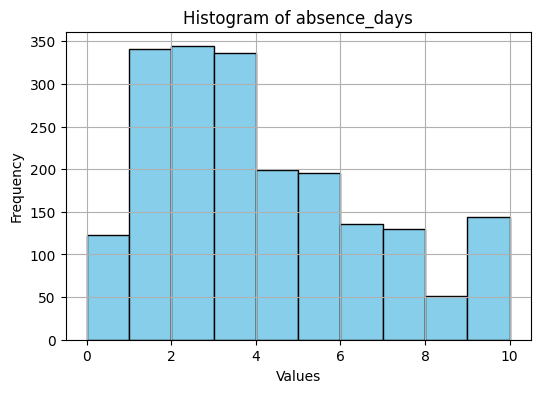

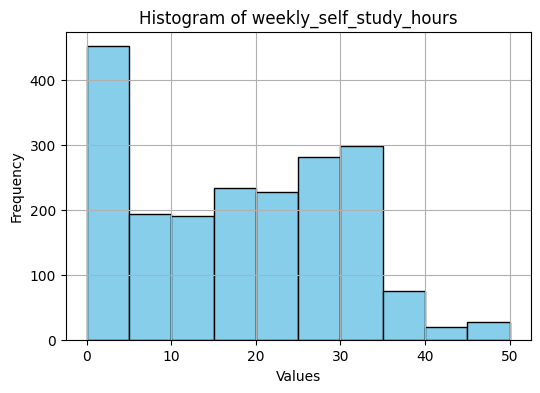

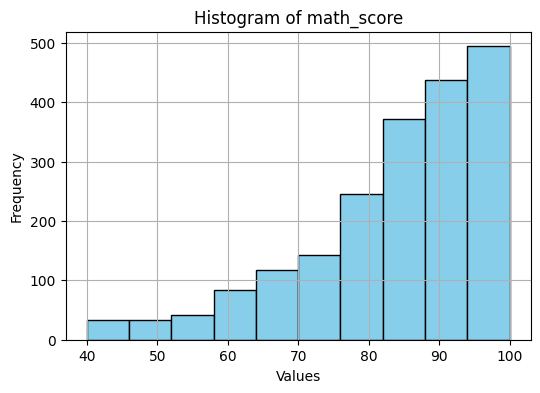

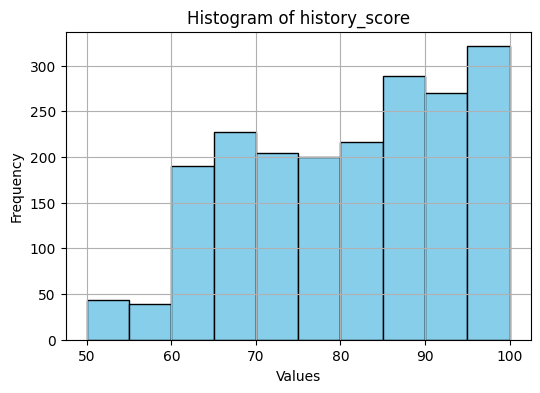

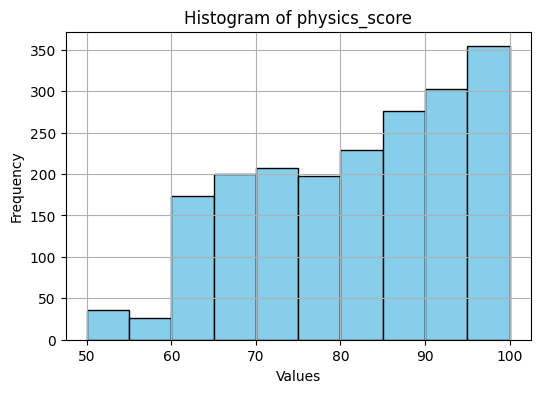

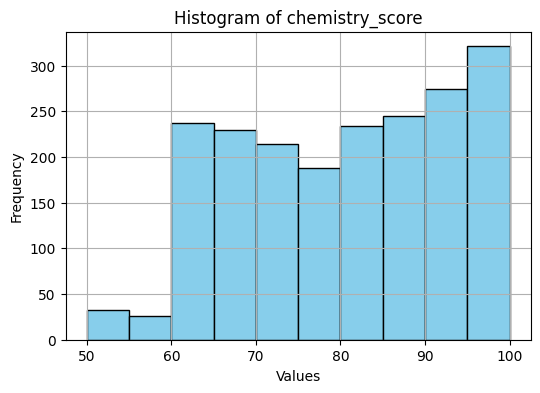

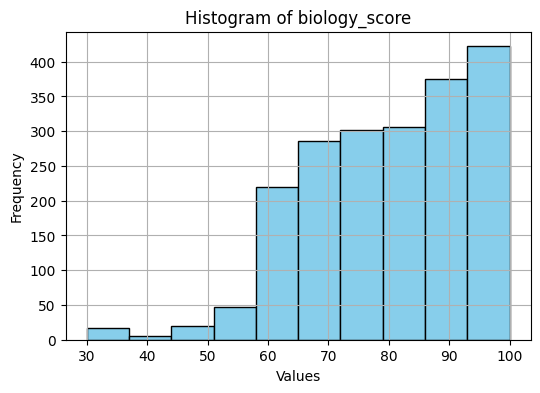

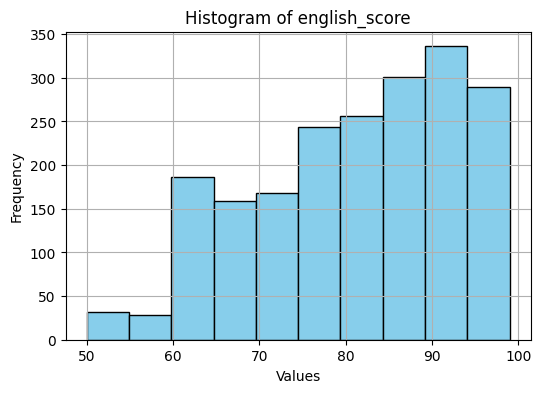

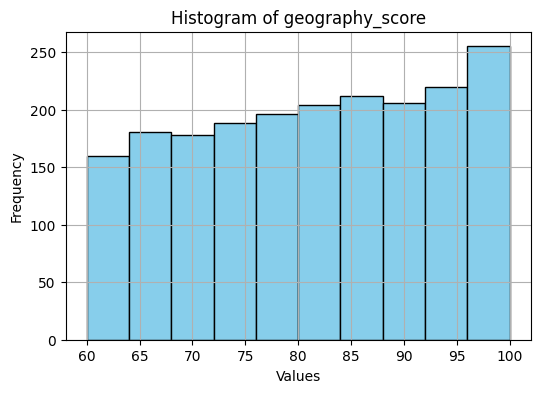

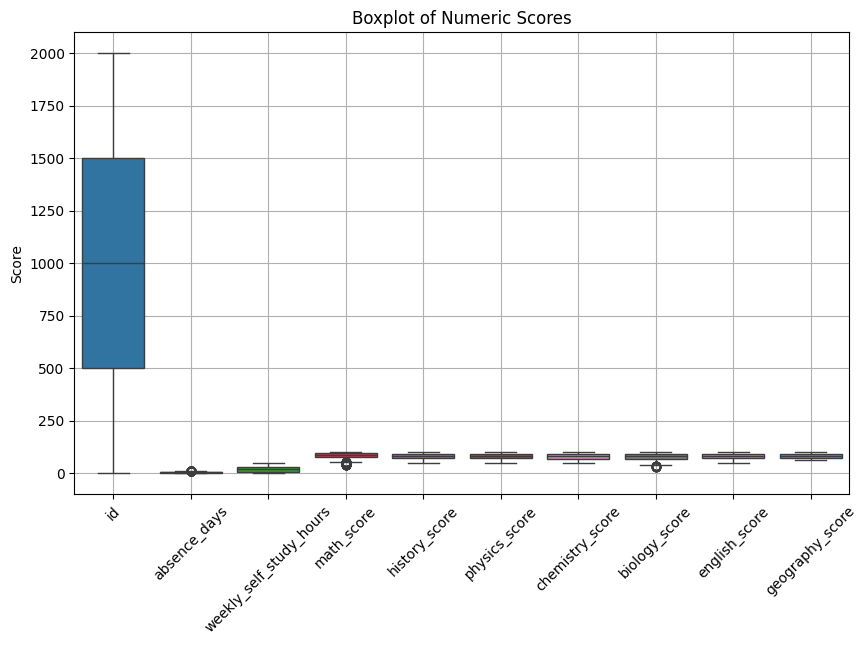

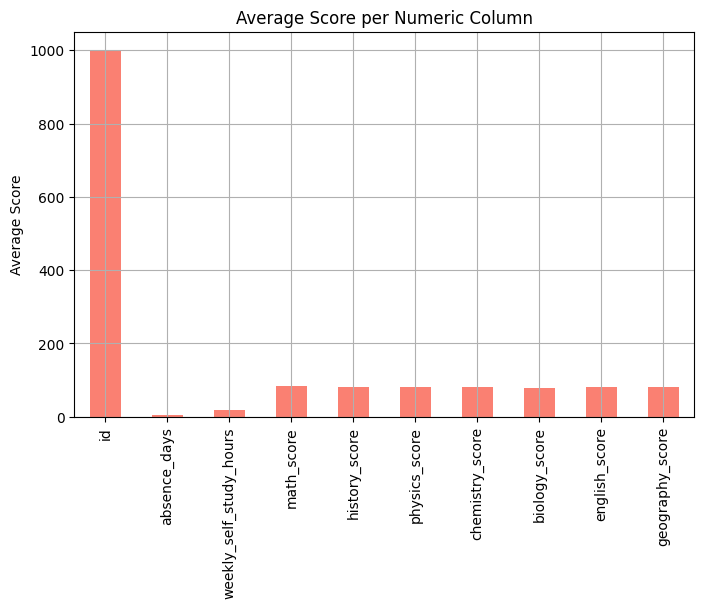

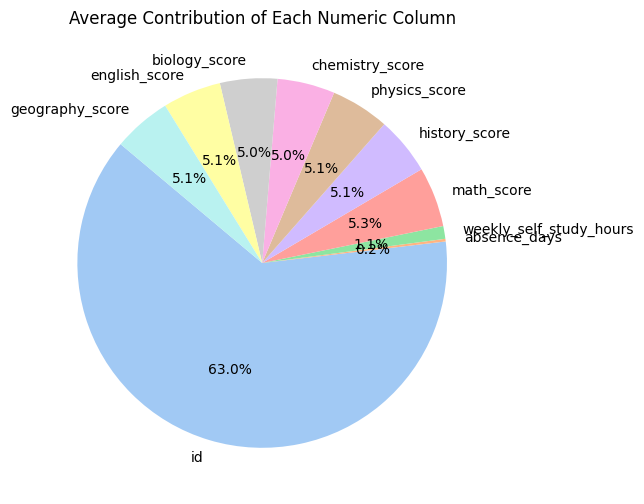

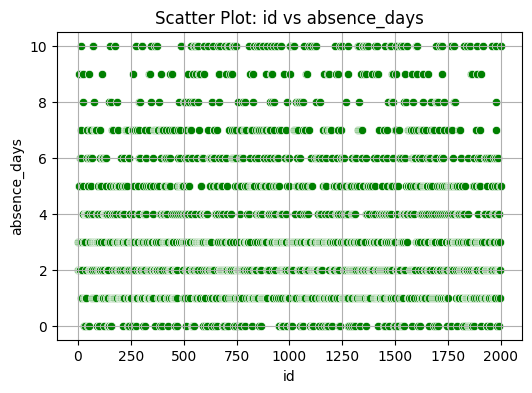

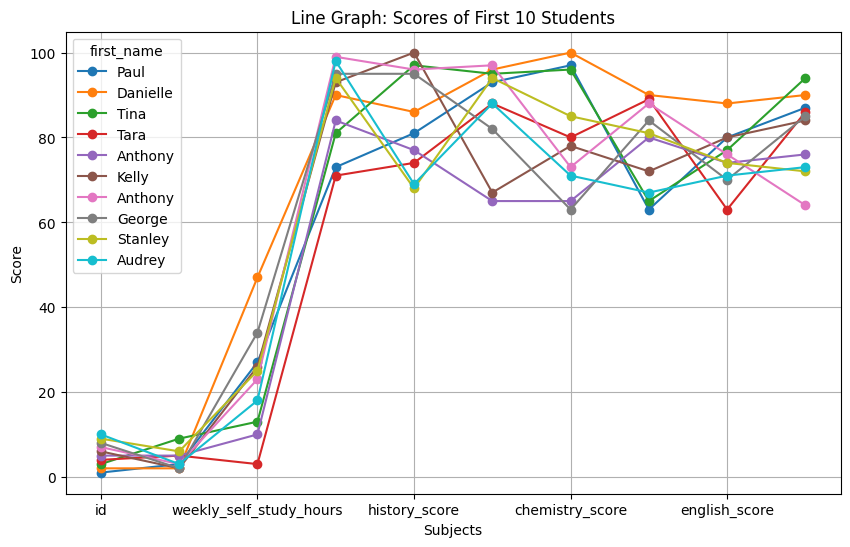

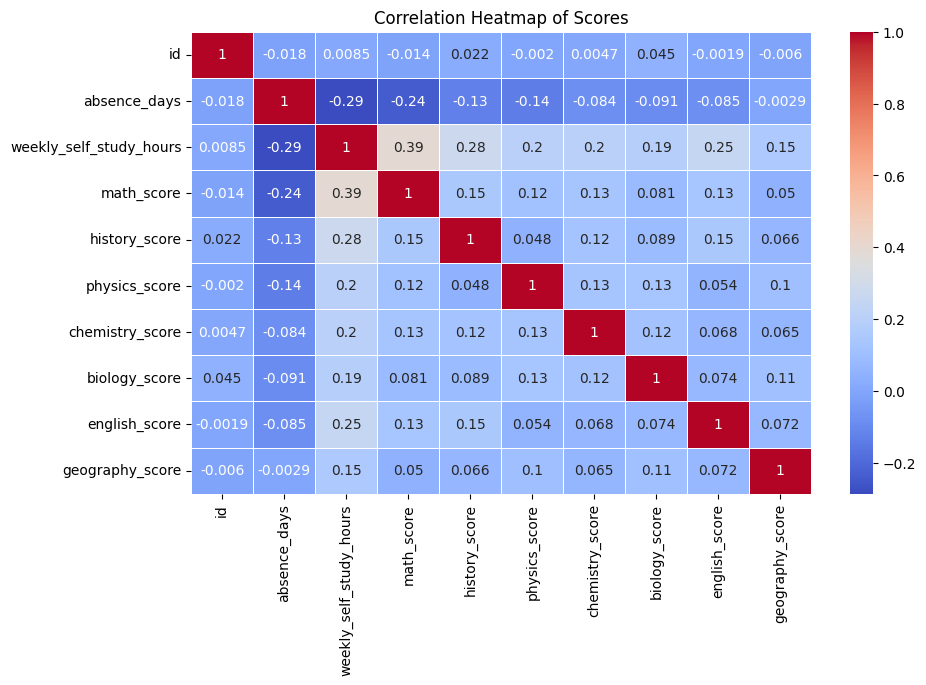

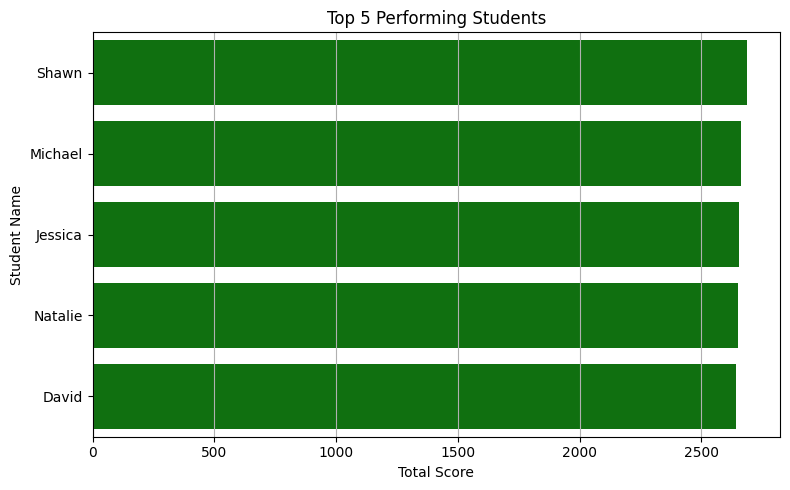

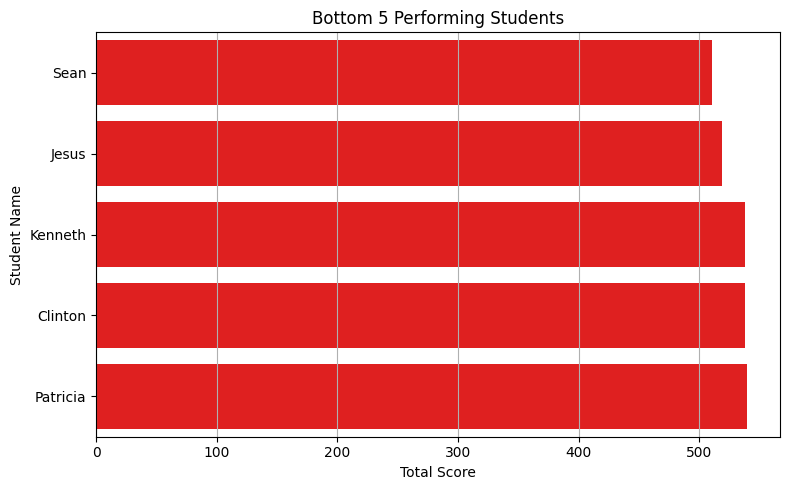

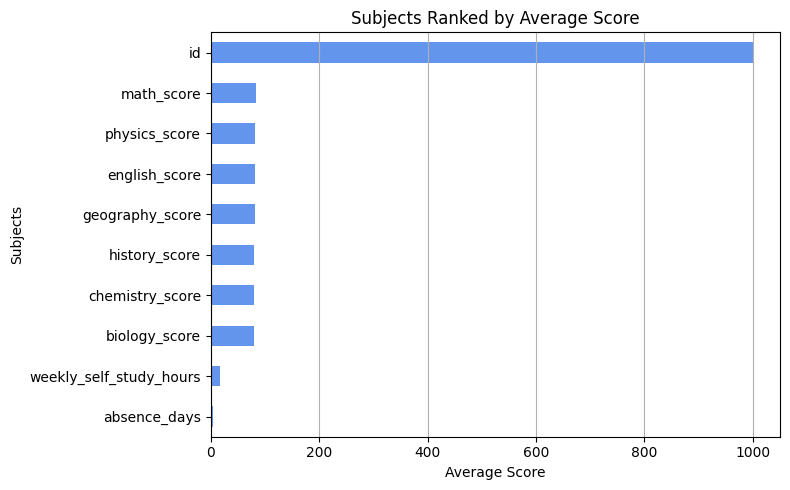


✅ Model Training Complete
🔍 Mean Squared Error: 139.09
📈 R-squared Score: 0.16


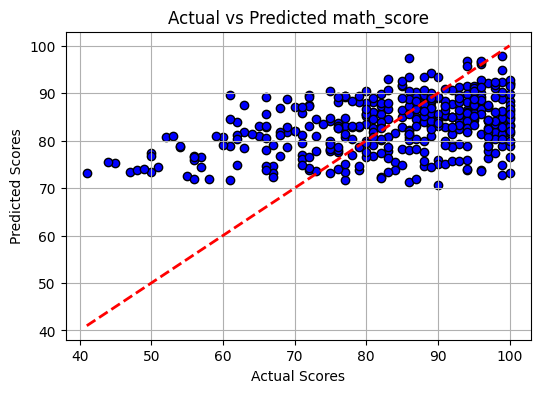

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------------
# Load the dataset
# -----------------------------------
df = pd.read_csv("/content/student-scores python.csv")  # Change if needed
print(df.info())
print(df.describe())

# Clean data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Identify numeric columns (e.g., subject scores)
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_cols)

# -----------------------------------
# 1. Histogram
# -----------------------------------
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# -----------------------------------
# 2. Box Plot
# -----------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# -----------------------------------
# 3. Bar Chart (Average Scores)
# -----------------------------------
avg_scores = df[numeric_cols].mean()
plt.figure(figsize=(8, 5))
avg_scores.plot(kind='bar', color='salmon')
plt.title('Average Score per Numeric Column')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

# -----------------------------------
# 4. Pie Chart
# -----------------------------------
plt.figure(figsize=(6, 6))
plt.pie(avg_scores, labels=avg_scores.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Average Contribution of Each Numeric Column')
plt.show()

# -----------------------------------
# 5. Scatter Plot (First Two Numeric Columns)
# -----------------------------------
if len(numeric_cols) >= 2:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], color='green')
    plt.title(f'Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.grid(True)
    plt.show()

# -----------------------------------
# 6. Line Graph (Scores of First 10 Students)
# -----------------------------------
df_line = df.head(10)
if 'first_name' in df.columns:
    df_line = df_line.set_index('first_name')

df_line[numeric_cols].T.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Line Graph: Scores of First 10 Students")
plt.ylabel("Score")
plt.xlabel("Subjects")
plt.grid(True)
plt.show()

# -----------------------------------
# 7. Heatmap
# -----------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Scores")
plt.show()

# -------------------------------------
# 8. Identify Top and Bottom Performers (Cleaned)
# -------------------------------------

# Compute total score
df['total_score'] = df[numeric_cols].sum(axis=1)

# Top 5 Students
top_students = df.sort_values(by='total_score', ascending=False).head(5)

# Bar Plot for Top 5 Performing Students
plt.figure(figsize=(8, 5))
sns.barplot(x='total_score', y='first_name', data=top_students, color='green')
plt.title("Top 5 Performing Students")
plt.xlabel("Total Score")
plt.ylabel("Student Name")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Bottom 5 Students
bottom_students = df.sort_values(by='total_score', ascending=True).head(5)

# Bar Plot for Bottom 5 Performing Students
plt.figure(figsize=(8, 5))
sns.barplot(x='total_score', y='first_name', data=bottom_students, color='red')
plt.title("Bottom 5 Performing Students")
plt.xlabel("Total Score")
plt.ylabel("Student Name")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Average scores for subjects (excluding total_score column itself)
avg_scores = df[numeric_cols].drop(columns=['total_score'], errors='ignore').mean()

# Bar Plot for Subjects Ranked by Average Score
plt.figure(figsize=(8, 5))
avg_scores.sort_values().plot(kind='barh', color='cornflowerblue')
plt.title("Subjects Ranked by Average Score")
plt.xlabel("Average Score")
plt.ylabel("Subjects")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


# -----------------------------------
# 9. Model Training: Predict math_score
# -----------------------------------
target_col = 'math_score'  # Correct column name from your dataset

if target_col in numeric_cols:
    # Features and target
    X = df[numeric_cols].drop(columns=[target_col])
    y = df[target_col]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n✅ Model Training Complete")
    print(f"🔍 Mean Squared Error: {mse:.2f}")
    print(f"📈 R-squared Score: {r2:.2f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title(f'Actual vs Predicted {target_col}')
    plt.grid(True)
    plt.show()

else:
    print(f"❌ Target column '{target_col}' not found.")
